In [12]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os



In [13]:
load_dotenv()

True

In [14]:
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

In [15]:
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

In [16]:
query = """
SELECT 
    ProductName,
    SUM(Quantity) AS total_quantity,
    SUM(Sales) AS total_revenue
FROM superstore
GROUP BY ProductName
ORDER BY total_revenue DESC
LIMIT 10;  
"""

In [17]:
df = pd.read_sql(query, conn)

C:\Users\kusha\AppData\Local\Temp\ipykernel_24980\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [18]:
df.head()

,ProductName,total_quantity,total_revenue
0,"Hoover Stove, Red",20.0,11028.318
1,Ibico EPK-21 Electric Binding System,5.0,9449.950
2,"Motorola Smart Phone, Cordless",14.0,8677.530
3,Fellowes PB500 Electric Punch Plastic Comb Bin...,8.0,8134.336
4,"Nokia Smart Phone, with Caller ID",14.0,8050.266


In [19]:
print(df)

                                         ProductName  total_quantity  \
0                                  Hoover Stove, Red            20.0   
1               Ibico EPK-21 Electric Binding System             5.0   
2                     Motorola Smart Phone, Cordless            14.0   
3  Fellowes PB500 Electric Punch Plastic Comb Bin...             8.0   
4                  Nokia Smart Phone, with Caller ID            14.0   
5          Cubify CubeX 3D Printer Triple Head Print             4.0   
6            SAFCO Executive Leather Armchair, Black            17.0   
7               Motorola Smart Phone, with Caller ID            11.0   
8               Sauder Classic Bookcase, Traditional            13.0   
9                     KitchenAid Refrigerator, Black            10.0   

   total_revenue  
0      11028.318  
1       9449.950  
2       8677.530  
3       8134.336  
4       8050.266  
5       7999.980  
6       7803.000  
7       7100.940  
8       5667.870  
9       5273.700 

In [20]:
df['ProductName'] = df['ProductName'].apply(lambda x: x[:25] + '...' if len(x) > 25 else x)

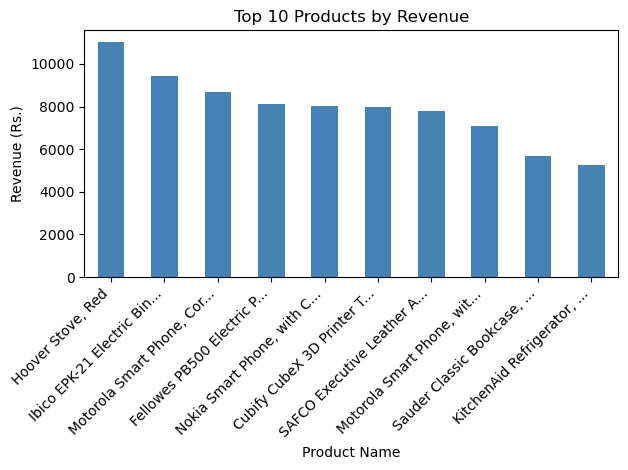

In [21]:
df.plot(kind='bar', x='ProductName', y='total_revenue', color='steelblue', legend=False)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue (Rs.)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()